In [2]:
import cv2
import numpy as np
np.seterr(over='ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')
from pylab import hist, show, xticks
from collections import Counter
grids = []

In [8]:
def get_pixel(img, center, x, y):
	
	new_value = 0
	
	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1
			
	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass
	
	return new_value


In [3]:
def Original_Pattern(img,x,y):
    center = img[x][y]
    
    val_ab = []
    
    val_ab.append(get_pixel(img,center,x-1,y-1))
   
    val_ab.append(get_pixel(img,center,x-1,y))
    
    val_ab.append(get_pixel(img,center,x-1,y+1))
    
    val_ab.append(get_pixel(img,center,x,y+1))
    
    val_ab.append(get_pixel(img,center,x+1,y+1))
    
    val_ab.append(get_pixel(img,center,x+1,y))
    
    val_ab.append(get_pixel(img,center,x+1,y-1))
    
    val_ab.append(get_pixel(img,center,x,y-1))
    
    return val_ab
    

In [4]:
def Calculate_lbp(val_ab):
    power_val=np.array([1,2,4,8,16,32,64,128])
    
    
    val = 0
    
    for i in range(len(val_ab)):
        
        val += val_ab[i]*power_val[i]
        
    return val

In [5]:
def Is_Uniform(pattern):
    trans_count = 0
    for i in range(len(pattern)):
        if i < len(pattern) - 1:
            if pattern[i] != pattern[i+1]:
                trans_count += 1
    return True if trans_count<=2 else False
        

In [6]:
def RLBP(img_lbp,tile_height,tile_width):
    height, width= img_lbp.shape
    tiled_array = img_lbp.reshape(height // tile_height,tile_height,width//tile_width,tile_width)
    tiled_array = tiled_array.swapaxes(1,2)
    return tiled_array
   

In [ ]:
'''def gridImg(img,width,height,x,y):
	grids=[]
	tempGrid=[]
	for k in range(height):
		for l in range(width):
			for i in range(x):
				for j in range(y):
					tempGrid[i] = img[i]
					tempGrid[j] = img[j]
			grids.append(tempGrid)
			tempGrid=[]
			
	return grids
    '''

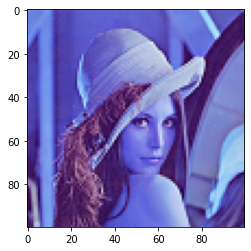

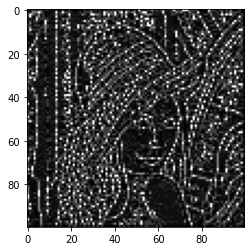

LBP Program is finished
7452
58
[[ 59   0  59 ...  59   1   0]
 [ 15  15 127 ...  59  15   7]
 [ 59 255 127 ...  15  59  31]
 ...
 [ 59  15  31 ...  15  63  31]
 [ 59  63  15 ...  63  59   3]
 [ 31  15   7 ...  15   1   0]]


In [9]:
img_bgr = cv2.imread("Lena.jpg")
original_pattern = []
lbp_values = []
degisken = []

height, width, _ = img_bgr.shape
uniform_count = 0

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)



for i in range(0,height):
	for j in range(0,width):
		original_pattern = Original_Pattern(img_gray,i,j)
		if Is_Uniform(original_pattern):
			uniform_count += 1
			if original_pattern not in degisken:
 				degisken.append(original_pattern)
 			           
			for k in range(8):
				rotated_pattern = np.roll(original_pattern,k)   
				lbp_values.append(Calculate_lbp(rotated_pattern))
                
			img_lbp[i][j] = min(lbp_values)
			lbp_values = []
		else:
			img_lbp[i][j] = 59
            

#grids = gridImg(img_lbp,width,height,10,10)   

#l = np.array_split(img_lbp,3,axis=0)
#for i in l:
#    l = np.array_split(i,3,axis=1)
#    grids += l





#for i in range(0,height):
#	for j in range(0,width):
 #       if(i%10==0 and j%10==0):
#          new_img[i][j] = img_lbp[i][j]
#		RLBP(new_img)
                

        

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")
print(uniform_count)
print(len(degisken))
print(img_lbp)



0
10
10


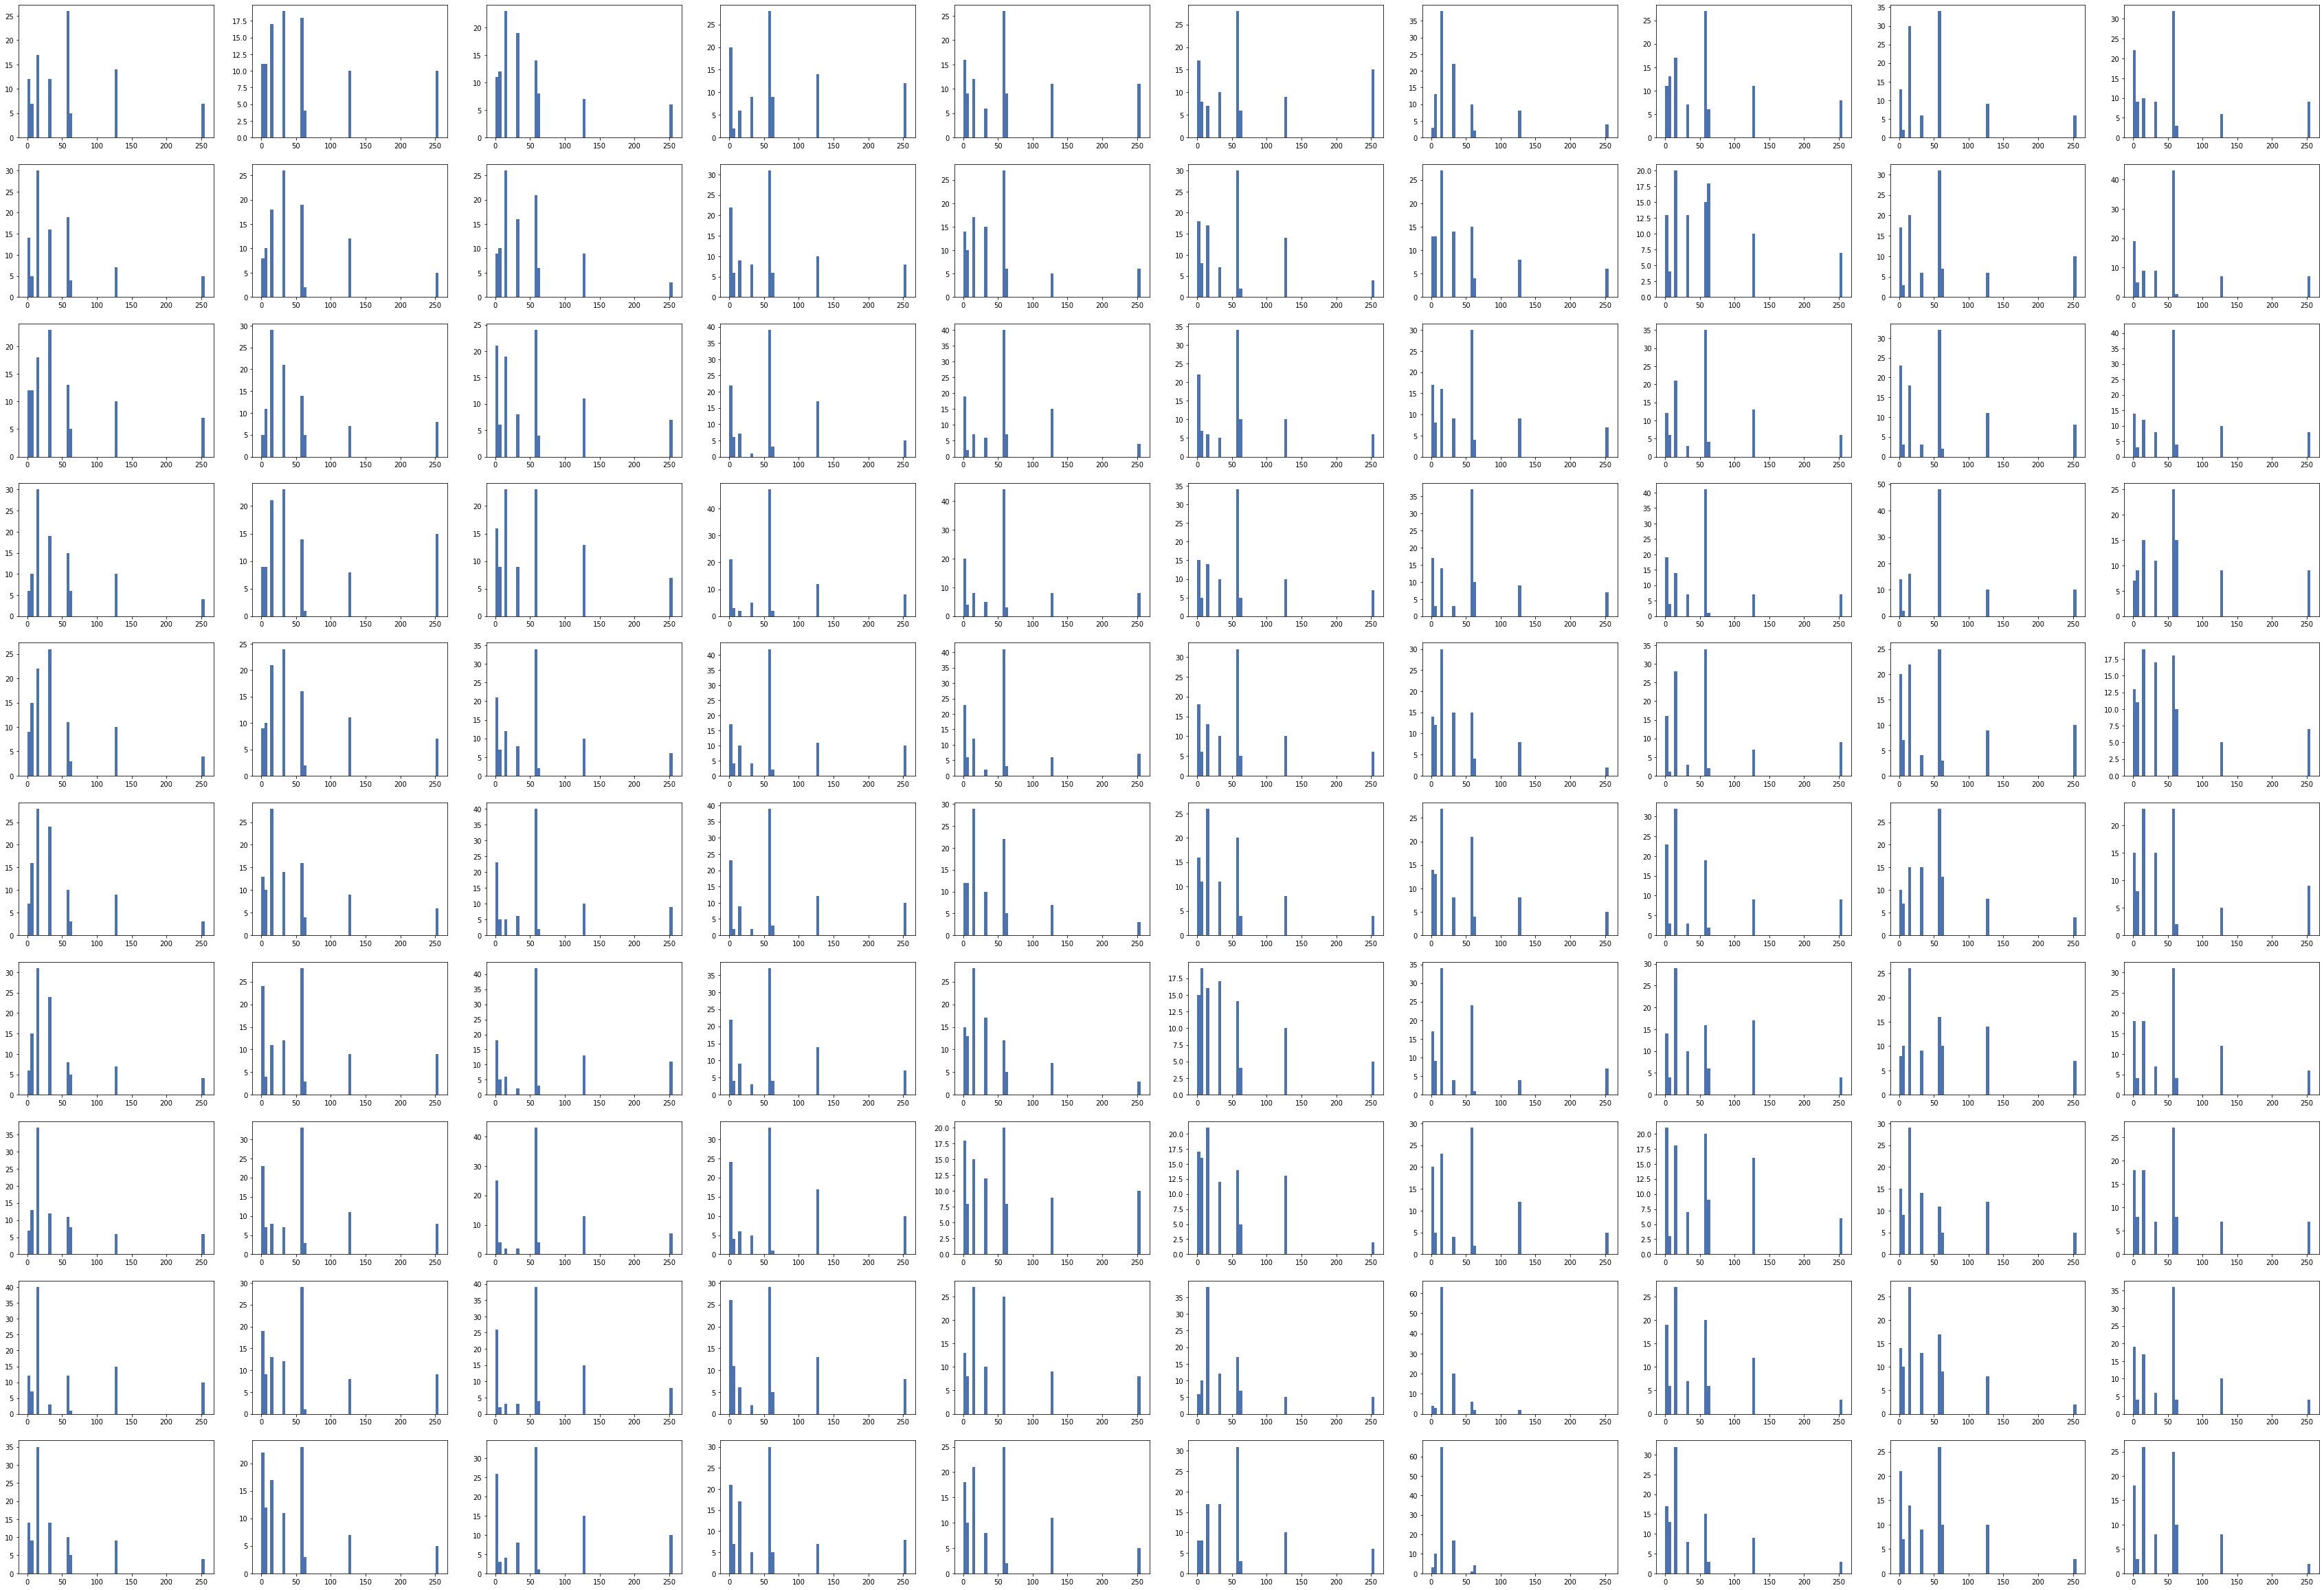

In [10]:
deneme = RLBP(img_lbp,10,10)
x,y,_,_ = deneme.shape
previous_values = {}
#fig, ax = plt.subplots(1,x*y)
fig,ax = plt.subplots(ncols=x,nrows=y,figsize=(60,42))


for i in range(x):
    for j in range(y):
        ax[i][j].hist(deneme[i][j].flat,bins=255,range=(0,255))
        #plt.hist(deneme[i][j].flat,bins=59,range=(0,255));
        #plt.savefig('hist'+str(i*10+j)+'.png')

        
        

#plt.show()
#print(previous_values)
print(len(previous_values))
print(x)
print(y)
#plt.tight_layout()
plt.savefig('hist.png')
plt.show()


(10, 10, 10, 10)

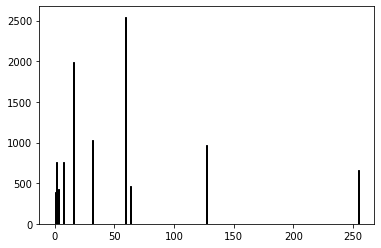

In [20]:
plt.hist(deneme.flat,bins=255,range=(0,255),edgecolor="black");
deneme.shape

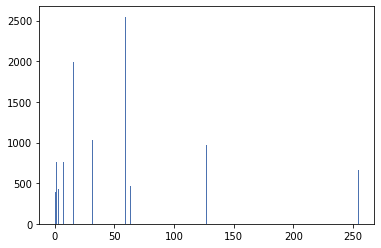

In [19]:
 plt.hist(img_lbp.flat,bins=255,range=(0,255));

dict_values([394, 760, 427, 764, 1985, 1029, 2548, 460, 974, 659])


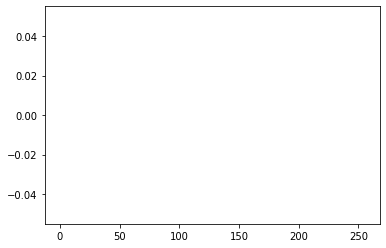

In [18]:
# deneme = RLBP(img_lbp,10,10)
x,y,_,_ = deneme.shape
previous_values = {}

for i in range(x):
    for j in range(y):
       # print(deneme[i][j])
        c = Counter(deneme[i][j].flat)
        previous_values = dict(Counter(c)+Counter(previous_values))
        previous_values= dict(sorted(previous_values.items()))
        
        

#plt.show()
#print(previous_values)
print(previous_values.values())
plt.hist(previous_values.values(),bins=59,range=(0,255));

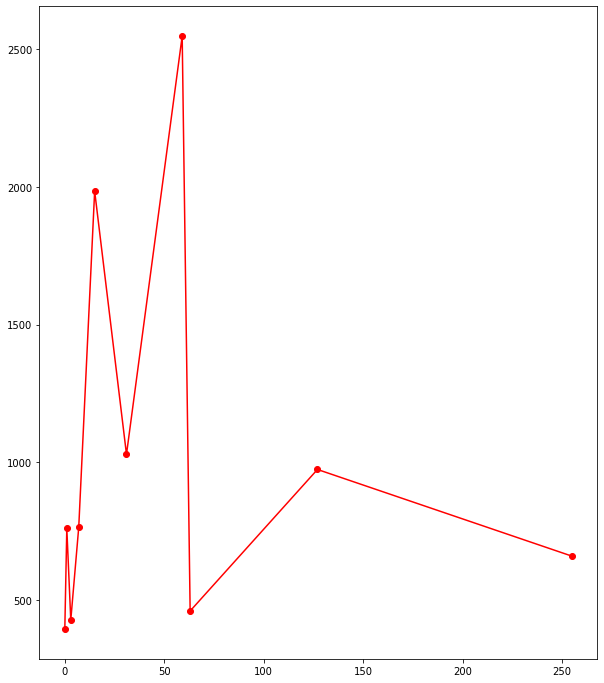

{0: 394, 1: 760, 3: 427, 7: 764, 15: 1985, 31: 1029, 59: 2548, 63: 460, 127: 974, 255: 659}
<class 'dict'>


In [17]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
#plt.bar(c.keys(), c.values())
c = dict(sorted(c.items()))
plt.plot(list(c.keys()), list(c.values()), color='red', marker='o')

plt.show()
print(c)
print(type(c))

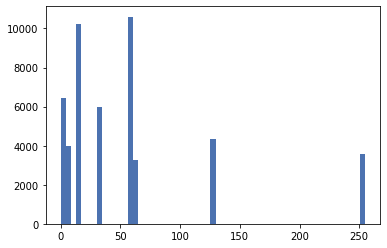

In [12]:
plt.hist(img_lbp.flat,bins=59,range=(0,255));
plt.savefig('hist.png')

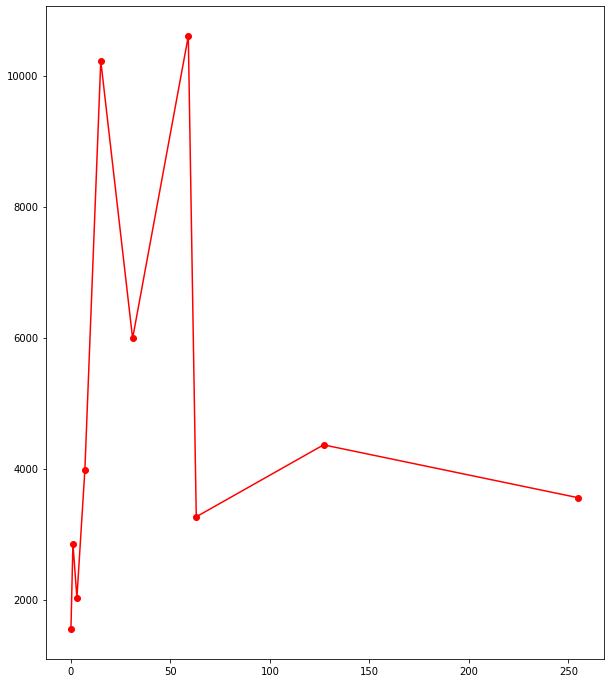

{0: 1549, 1: 2854, 3: 2029, 7: 3975, 15: 10224, 31: 5987, 59: 10601, 63: 3264, 127: 4362, 255: 3555}
<class 'dict'>


In [13]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
#plt.bar(c.keys(), c.values())
c = dict(sorted(c.items()))
plt.plot(list(c.keys()), list(c.values()), color='red', marker='o')

plt.show()
print(c)
print(type(c))

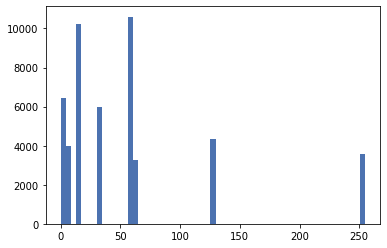

In [14]:
plt.hist(img_lbp.flat,bins=59,range=(0,255));

AttributeError: 'tuple' object has no attribute 'set_title'

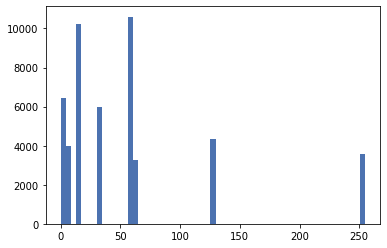

In [334]:
ax = plt.hist(img_lbp.flat,bins=59,range=(0,255));
ax.set_title("dd")

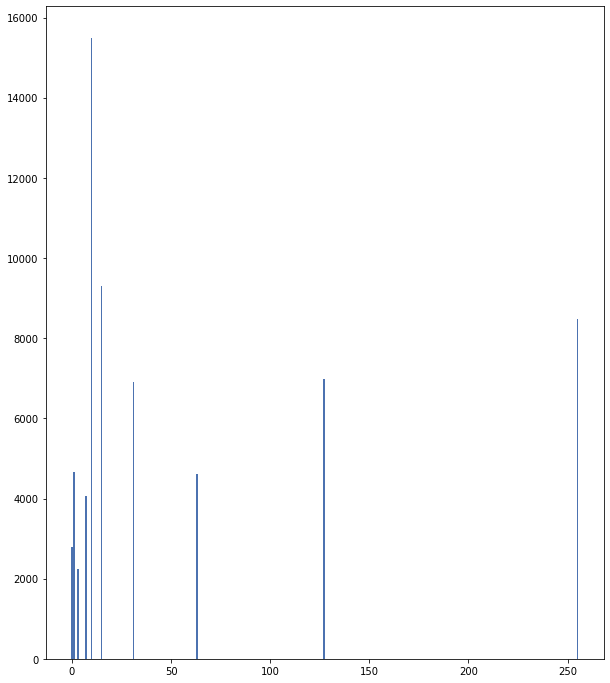

Counter({10: 15503, 15: 9302, 255: 8484, 127: 6970, 31: 6913, 1: 4663, 63: 4609, 7: 4067, 0: 2779, 3: 2246})


In [125]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
plt.bar(c.keys(), c.values())

plt.show()
print(c)